<a href="https://colab.research.google.com/github/m677s345/EECS731_MS_Project1/blob/master/EECS731_project1_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install cookiecutter and build code framework

In [ ]:
!pip install cookiecutter
!cookiecutter https://github.com/drivendata/cookiecutter-data-science


Importing packages

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Tdf= pd.read_csv('/content/EECS731_project1_pandas/data/processed/110-tavg-all-7-2000-2020_cleaned.csv', header=[0], index_col=0)   #reading and indexing temperature to dataframe
Tdf.index=pd.to_datetime(Tdf.index)
LPdf= pd.read_csv('/content/EECS731_project1_pandas/data/processed/LivestockPrices_cleaned_Beef.csv',header=[0],index_col=0)        #reading and indexing Livestock prices into dataframe
LPdf.index=pd.to_datetime(LPdf.index)
Meatdf= pd.read_csv('/content/EECS731_project1_pandas/data/processed/MeatStatsFull_cleaned_1.csv', header=[0],index_col=0)
Meatdf.index=pd.to_datetime(Meatdf.index)



Statistics for medium grade steers from 500 to 800 pounds and prices are per 100 pounds.

In [294]:
MedStdf=LPdf.iloc[:,0:3]                      #isolating the steer date from the beef data
yearly_ST_ohlc=MedStdf.resample('A').ohlc()   #determining the yeary high low and start for each weight class of steers
yearly_ST_max=MedStdf.resample('A').max()     #determining the yearly max price of steers 
#print(yearly_ST_ohlc)
#print(yearly_ST_max)
MedStdf.describe()                            #describes any other statistics about the Steer dataset over the course of 20 years

MeatStdf=pd.DataFrame(Meatdf['--Steers']+Meatdf['--Steers.1'], columns=list('S'))  #combines the total number of steers sent to slaughter 

yearly_MeatSt_ohlc=MeatStdf.resample('A').ohlc()   #determining the yeary high low and start for each weight class of steers
yearly_MeatSt_max=MeatStdf.resample('A').max()     #determining the yearly max price of steers
#MeatStcount.describe()                            #describes any other statistics about the Steer dataset over the course of 20 years

Statistics for average temperature across the US

In [295]:
yearly_T_ohlc=Tdf.resample('A').ohlc()    #determining the yeary high low and start for Average US temperature
yearly_max=Tdf.resample('A').max()        #Determines the high value for the Average temperature per year

#print(yearly_T_ohlc)
#print(yearly_max)
#Tdf.describe() #describes any other statistics about the Temperature dataset over the course of 20 years

Merging beef price datasets and Temperature data to form on dataset with a common Datetime 

In [304]:
df=pd.merge(Tdf,MedStdf, how = 'inner', right_index = True, left_index = True)    #Merges the temperature and steer data into a single dataset
df2=pd.merge(MeatStdf,Tdf, how = 'inner', right_index = True, left_index = True)  #Merges the Temperatuere and slaughter data into a dataset
#print(df2)
#print(df.max())

Graphical representration of monthly cattle prices as a function of time(figure1) and temperature(Figure2)
Figure 1 shows seasonal changes in temperature and steer prices. We can see that there are local maxima that cycle with a general upward trend. The peaks roughly coencide with maximum temperatures.

Figure 2 shows the density of month that cattle were a certain price vs temperature. Each point represents a month at a price and temperature. There is a higher density of points at temperatures above 65

False


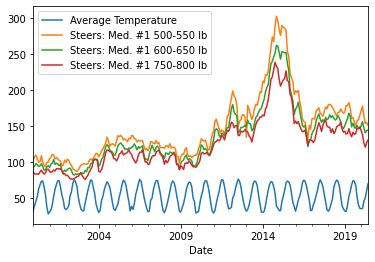

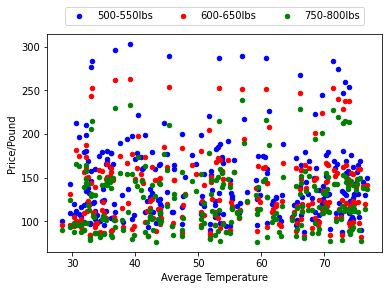

In [270]:
plt.close('all')
df.plot()

ax1=df.plot.scatter(x='Average Temperature',y='Steers: Med. #1 500-550 lb',c='b',label='500-550lbs');
ax2=df.plot.scatter(x='Average Temperature',y='Steers: Med. #1 600-650 lb',c='r',ax=ax1, label='600-650lbs');
x3=df.plot.scatter(x='Average Temperature',y='Steers: Med. #1 750-800 lb',c='g',ax=ax1, label='750-800lbs');
ax1.set_ylabel('Price/Pound')
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3)


print(ax1 == ax2 == ax3)

Figures 2&3 below show the coorelation between steer carcas counts as a function of time and temperature as above. It seems like there is a much stronger coorelation between temperature and slaughter count than temperature and price per 100 pounds.

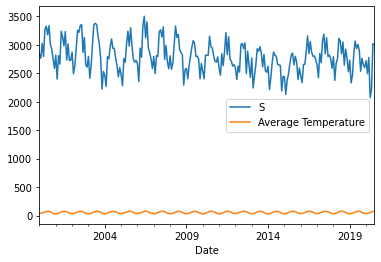

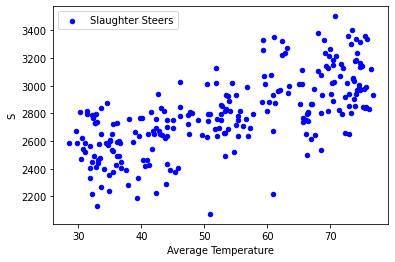

In [305]:
df2.plot()
Meat=df2.plot.scatter(x='Average Temperature',y='S',c='b',label='Slaughter Steers');